In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import numpy as np
import pandas as pd
import GPy
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    pass
    
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
    
%matplotlib inline

In [2]:
df=pd.read_csv('bitcoin_20172018april.csv')

In [3]:
df=df[:-2]
df["Dataindex"] = df.index                        ## Keep index, could be usefull
df.index=df.Date    
df.index=df.index.to_datetime()
df=df.drop(columns=['Date'])

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:to_datetime is deprecated. Use pd.to_datetime(...)


In [6]:
week_avg=df.groupby([df.index.weekday]).mean()

In [8]:
df['Change']=df['Close Price'].pct_change()

In [9]:
week_avg_change=df['Change'].groupby([df.index.weekday]).mean()

In [10]:
week_std=df['Change'].groupby([df.index.weekday]).std()

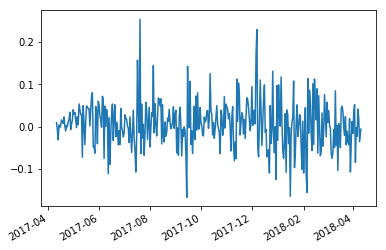

In [14]:
df['Change'].plot()

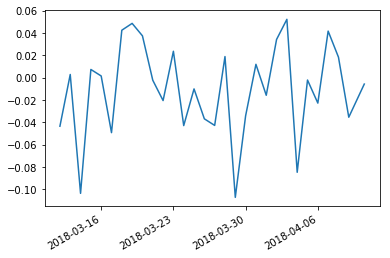

In [15]:
df['Change'][-30:].plot()

In [16]:
## PREPROCESSING

df["Weekday"] = df.index.weekday                 ## 0 = Monday, 6 = Sunday

Y = np.array(df["Close Price"]).reshape(-1, 1)

X = np.array(df["Dataindex"]).reshape(-1, 1)

train_per=0.8
split_ind=int(len(X)*train_per)
X_train=X[:split_ind]
Y_train=Y[:split_ind]
X_test=X[split_ind:]
Y_test=Y[split_ind:]

In [28]:
Yc=np.array(df["Change"][1:]).reshape(-1,1)
#Yc=scale(Yc)
Yc_train=Yc[:split_ind]
Yc_test=Yc[split_ind:]
Xc=X[1:]
Xc_train=Xc[:split_ind]
Xc_test=Xc[split_ind:]

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


GP_regression.,value,constraints,priors
mul.rbf.variance,0.1519778909430173,+ve,
mul.rbf.lengthscale,1.0584193907094865,+ve,
mul.periodic_Matern52.variance,0.15197789094302147,+ve,
mul.periodic_Matern52.lengthscale,1.0601066408063333,+ve,
mul.periodic_Matern52.period,5.657450937275809,+ve,
Gaussian_noise.variance,1.0093716641614852e-05,+ve,


(array([[0.]]), array([[0.0057454]]))


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


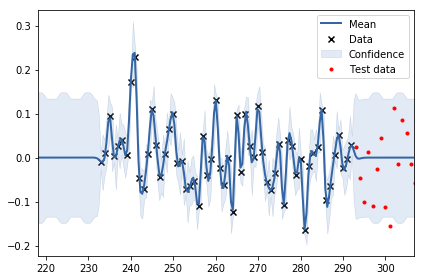

In [44]:
RBF = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1)
EXP_PER = GPy.kern.PeriodicExponential(input_dim=1)
LIN = GPy.kern.Linear(1)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
BIAS2 = GPy.kern.Bias(input_dim=1, variance=35)
BIAS3 = GPy.kern.Bias(input_dim=1, variance=35)
EXP = GPy.kern.Exponential(1)

RBF_PER = RBF*PERIODIC# EXP_PER
LIN_BIAS = LIN + LIN_BIAS
RBF_BIAS = RBF2 + BIAS2
EXP = EXP + LIN + BIAS3

m = GPy.models.GPRegression(Xc_train[-60:], Yc_train[-60:], RBF_PER)
m.optimize()
display(m)

m.plot()
plt.scatter(Xc_test,Yc_test,c='r',marker='.',label='Test data')
#plt.plot(Xc,Yc)
plt.legend()

print(m.predict(np.array([450]).reshape(-1, 1)))

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


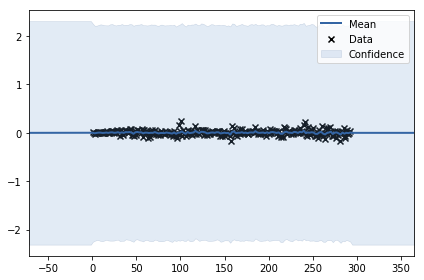

In [36]:
k=GPy.kern.RBF(input_dim=1,variance=0.38688,lengthscale=0.52346)
m = GPy.models.GPRegression(Xc_train, Yc_train, k)
m.plot()

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


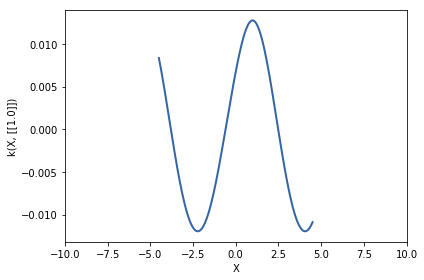

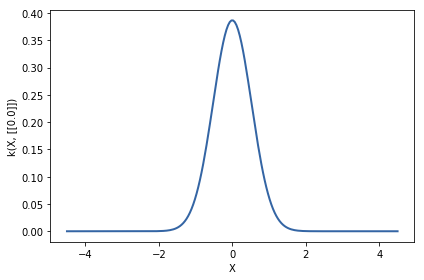

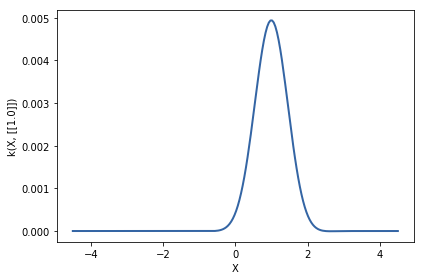

In [42]:
k1=GPy.kern.PeriodicMatern52(input_dim=1,variance=0.3868,lengthscale=3.308)
k1.plot()
plt.xlim(-10,10)
k2=GPy.kern.RBF(input_dim=1,variance=0.38688,lengthscale=0.52346)
k2.plot()
k3=k1*k2
k3.plot()

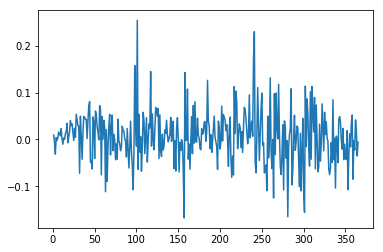

In [30]:
plt.plot(Xc,Yc)

In [ ]:
## RANDOM SEARCH FOR THE OPTIMAL PARAMETERS?